# Predicting Bicycle Traffic

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from pandas.tseries.holiday import USFederalHolidayCalendar
%matplotlib inline

In [2]:
plt.style.use('dark_background')

In [3]:
url1='https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Course/main/data/FremontBridge.csv'

url2='https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Course/main/data/BicycleWeather.csv'


In [4]:
counts = pd.read_csv(url1, index_col='Date', parse_dates=True)
weather = pd.read_csv(url2, index_col='DATE', parse_dates=True)

In [5]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [6]:
counts.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,137057.000000,137057.000000,137057.000000
mean,112.790452,51.411063,61.379390
std,143.368869,66.097014,89.246612
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


In [11]:
counts.shape

(137078, 3)

Resampling generates a unique sampling distribution on the basis of the actual data. 

[Re-sampling](https://www.geeksforgeeks.org/python-pandas-dataframe-resample/)

In [9]:
daily = counts.resample('d').sum() #daily sum
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] 

In [10]:
daily

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0
...,...
2020-10-27,4090.0
2020-10-28,3848.0
2020-10-29,4308.0


In [12]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [13]:
weather.describe()

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,28.292537,0.324627,-29.545522,166.672388,83.249254,24.692537,170.840299,22.154478,64.513433,-71.045522,...,-9991.537313,-9984.074627,-9491.537313,-9931.835821,-9961.686567,-8543.776119,-7999.000000,-9767.656716,-9849.746269,-9887.059701
std,62.763097,4.479127,545.736003,74.331651,50.563330,274.396498,296.343588,1298.860605,276.304370,1283.628567,...,273.179182,386.189416,2195.610628,817.085672,609.934146,3527.583977,4001.493373,1503.861989,1212.995740,1052.472800
min,0.000000,0.000000,-9999.000000,-16.000000,-71.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,0.000000,0.000000,111.000000,44.000000,22.000000,107.500000,120.000000,54.000000,67.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,0.000000,0.000000,0.000000,156.000000,83.000000,30.000000,200.000000,205.000000,67.000000,89.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,25.000000,0.000000,0.000000,222.000000,122.000000,40.000000,230.000000,240.000000,89.000000,112.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,559.000000,80.000000,173.000000,356.000000,183.000000,95.000000,360.000000,360.000000,192.000000,264.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [15]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2020-10-27,4090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-10-28,3848.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-10-29,4308.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
calendar = USFederalHolidayCalendar()

holidays = calendar.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

(8.0, 17.0)

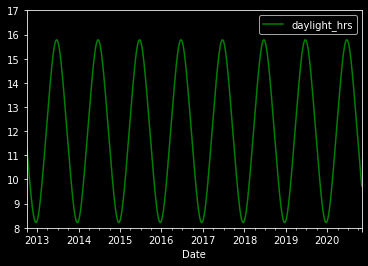

In [17]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):

    days = (date - datetime.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot(color='green')
plt.ylim(8, 17)

In [18]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [19]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [20]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [21]:
daily.describe()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
count,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,2951.000000,1064.000000,1064.000000,1064.000000,2951.000000
mean,10476.937309,0.142664,0.142664,0.143002,0.143002,0.143002,0.143002,0.142664,0.011860,11.985116,0.115446,12.567528,0.584586,4.041096
std,5486.649338,0.349789,0.349789,0.350135,0.350135,0.350135,0.350135,0.349789,0.108276,2.598472,0.259009,6.094262,0.493025,2.334314
min,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.218894,0.000000,-3.800000,0.000000,0.000000
25%,6266.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.485235,0.000000,8.050000,0.000000,2.020548
50%,9720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.952145,0.000000,11.675000,1.000000,4.041096
75%,14664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.514769,0.101378,17.750000,1.000000,6.061644
max,25712.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.781095,2.200787,26.700000,1.000000,8.082192


In [22]:
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

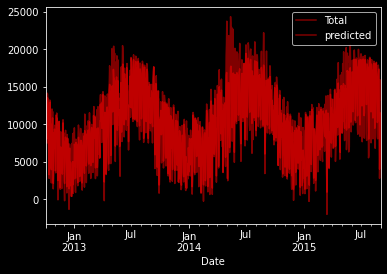

In [23]:
daily[['Total', 'predicted']].plot(alpha=0.5, color='red');

In [24]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

In [25]:
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [26]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon           2020.0  345.0
Tue           2441.0  333.0
Wed           2371.0  331.0
Thu           1929.0  341.0
Fri            712.0  324.0
Sat          -4413.0  318.0
Sun          -4534.0  332.0
holiday      -4750.0  653.0
daylight_hrs   515.0   36.0
PRCP         -2659.0  249.0
dry day       2191.0  133.0
Temp (C)       261.0   14.0
annual         108.0   71.0
